# Multiple Linear Regression


## Importing the necessary Libraries and Packages


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from matplotlib.markers import MarkerStyle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    mean_squared_log_error,
    r2_score,
    root_mean_squared_error,
    root_mean_squared_log_error,
)
from sklearn.model_selection import train_test_split

## Importing the csv file as a DataFrame


In [2]:
df = pd.read_csv("../../../../../Datasets/Startups.csv")
df.head()

,Research,Marketing,Profit
0,165349,401784,192262
1,162598,373899,191792
2,153442,357935,191050
3,144372,323200,182902
4,142107,300168,166188


## Exploratory Data Analysis


Formal information about the dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Research   44 non-null     int64
 1   Marketing  44 non-null     int64
 2   Profit     44 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


Description of the dataset


In [4]:
df.describe()

,Research,Marketing,Profit
count,44.000000,44.000000,44.000000
mean,81745.568182,177546.909091,119784.659091
std,41341.880291,90204.266894,34297.037985
min,15506.000000,28335.000000,65200.000000
25%,53227.000000,114425.750000,96762.500000
50%,75791.500000,168044.000000,109543.000000
75%,115878.750000,222099.000000,144724.750000
max,165349.000000,401784.000000,192262.000000


Checking if any null value exists


In [5]:
df.isnull().sum()

Research     0
Marketing    0
Profit       0
dtype: int64

Columns of the dataset


In [6]:
df.columns

Index(['Research', 'Marketing', 'Profit'], dtype='object')

Correlations between the variables


In [7]:
df.corr()

,Research,Marketing,Profit
Research,1.000000,0.973596,0.975670
Marketing,0.973596,1.000000,0.990908
Profit,0.975670,0.990908,1.000000


## Now taking 2 parts from the dataset:

### X : which contains all the data except the <b>Profit</b> column<br>y : which contains only the <b>Profit</b> column


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualisation of the Data


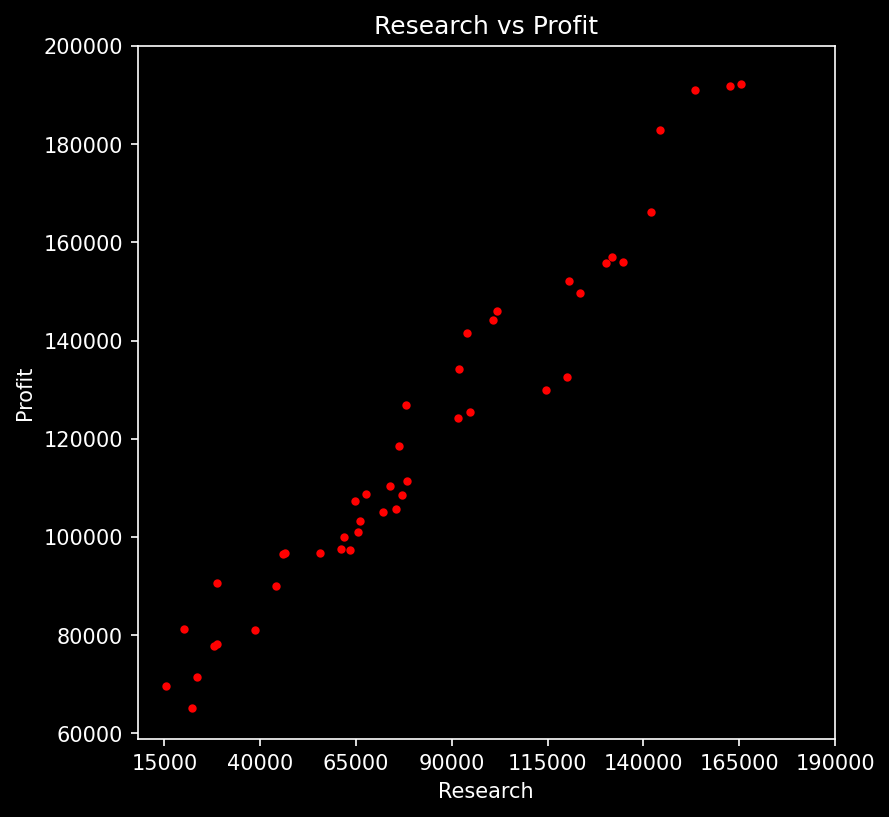

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
Research = df["Research"]
Profit = df["Profit"]
plt.scatter(Research, Profit, marker=MarkerStyle("."), color="red")
plt.xticks(np.arange(15000, 200000, 25000))
plt.yticks(np.arange(60000, 220000, 20000))
plt.title("Research vs Profit")
plt.xlabel("Research")
plt.ylabel("Profit")
plt.savefig("Images/Research_vs_Profit.png", bbox_inches="tight")

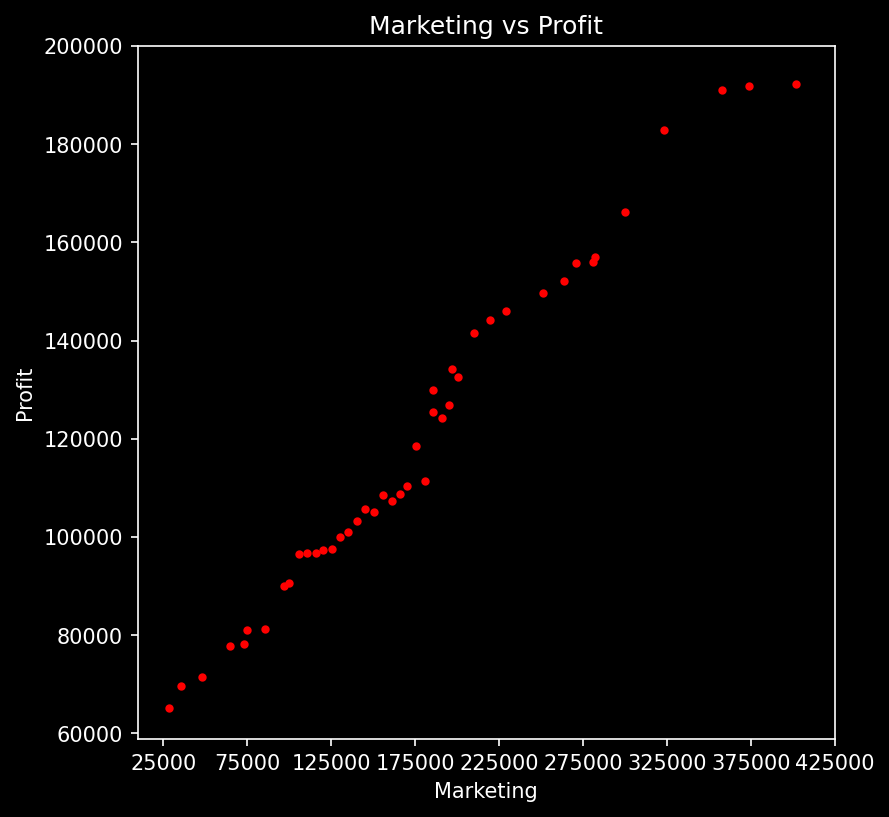

In [10]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
Marketing = df["Marketing"]
Profit = df["Profit"]
plt.scatter(Marketing, Profit, marker=MarkerStyle("."), color="red")
plt.xticks(np.arange(25000, 475000, 50000))
plt.yticks(np.arange(60000, 220000, 20000))
plt.title("Marketing vs Profit")
plt.xlabel("Marketing")
plt.ylabel("Profit")
plt.savefig("Images/Marketing_vs_Profit.png", bbox_inches="tight")

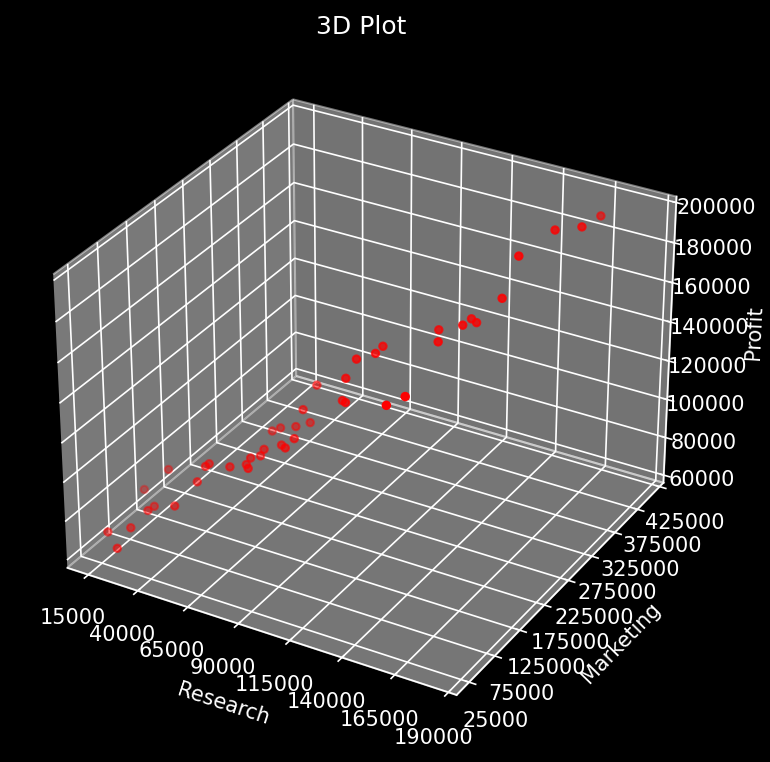

In [11]:
fig = plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
ax = fig.add_subplot(111, projection="3d")  # syntax for 3-D projection
ax.scatter(Research, Marketing, Profit, marker=MarkerStyle("."), color="red", s=50)  # type: ignore
ax.set_xticks(np.arange(15000, 200000, 25000))
ax.set_yticks(np.arange(25000, 475000, 50000))
ax.set_zticks(np.arange(60000, 220000, 20000))  # type: ignore
ax.set_xlabel("Research")
ax.set_ylabel("Marketing")
ax.set_zlabel("Profit")  # type: ignore
ax.set_title("3D Plot")
plt.savefig("Images/3D_Plot.png", bbox_inches="tight")

## Split the X and y dataframes for training and testing


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Implementation of the Model


In [13]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

## Performance of the Model


In [14]:
print("The coefficient of determination :", r2_score(y_test, y_pred))
adjusted_r2_score = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (  # type: ignore
    len(y_test) - X_test.shape[1] - 1
)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : 0.9855103094624644
The adjusted coefficient of determination : 0.9710206189249289


## Plotting the Regression


### Training Dataset


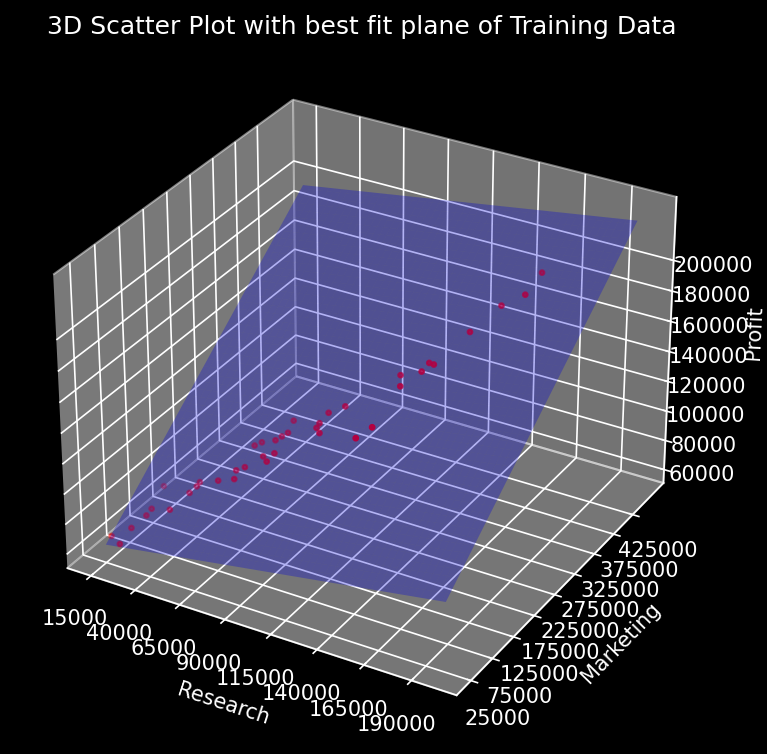

In [15]:
g = []
h = []
for i in range(len(X_train)):
    g.append(X_train[i][0])
    h.append(X_train[i][1])
r = mlr.predict(X_train).tolist()
x2 = [g[i] ** 2 for i in range(len(g))]  # squaring x values
y2 = [h[i] ** 2 for i in range(len(h))]  # squaring y values
xy = [g[i] * h[i] for i in range(len(g))]  # multiplying x and y values
xz = [g[i] * r[i] for i in range(len(g))]  # multiplying x and z values
yz = [h[i] * r[i] for i in range(len(h))]  # multiplying y and z values
xx = sum(g)  # sum of x values
Y = sum(h)  # sum of y values
Z = sum(r)  # sum of z values
XY = sum(xy)  # sum of xy values
XZ = sum(xz)  # sum of xz values
YZ = sum(yz)  # sum of yz values
X2 = sum(x2)  # sum of x2 values
Y2 = sum(y2)  # sum of y2 values
n = len(g)  # number of values
A = [[n, xx, Y], [xx, X2, XY], [Y, XY, Y2]]  # matrix A
B = [Z, XZ, YZ]  # matrix B
A_inv = np.linalg.inv(A)  # inverse of A
ans = np.matmul(A_inv, B)  # multiplying A inverse and B
a = ans[0]  # a value
b = ans[1]  # b value
c = ans[2]  # c value
fig = plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")  # changing the background color
ax = fig.add_subplot(111, projection="3d")  # syntax for 3-D projection
ax.scatter(g, h, r, marker=MarkerStyle("."), color="red")  # plotting points
ax.set_xticks(np.arange(15000, 200000, 25000))
ax.set_yticks(np.arange(25000, 475000, 50000))
ax.set_zticks(np.arange(60000, 220000, 20000))  # type: ignore
ax.set_xlabel("Research")
ax.set_ylabel("Marketing")
ax.set_zlabel("Profit")  # type: ignore
plt.title("3D Scatter Plot with best fit plane of Training Data")
p = np.linspace(15000, 200000, 100)  # creating a list of 100 values
q = np.linspace(25000, 475000, 100)  # creating a list of 100 values
p, q = np.meshgrid(p, q)  # creating a meshgrid
eq = a + b * p + c * q  # equation of plane
ax.plot_surface(p, q, eq, alpha=0.3, color="blue")  # plotting plane # type: ignore
plt.savefig("Images/3D_Plot_Training_Data.png", bbox_inches="tight")

### Test Dataset


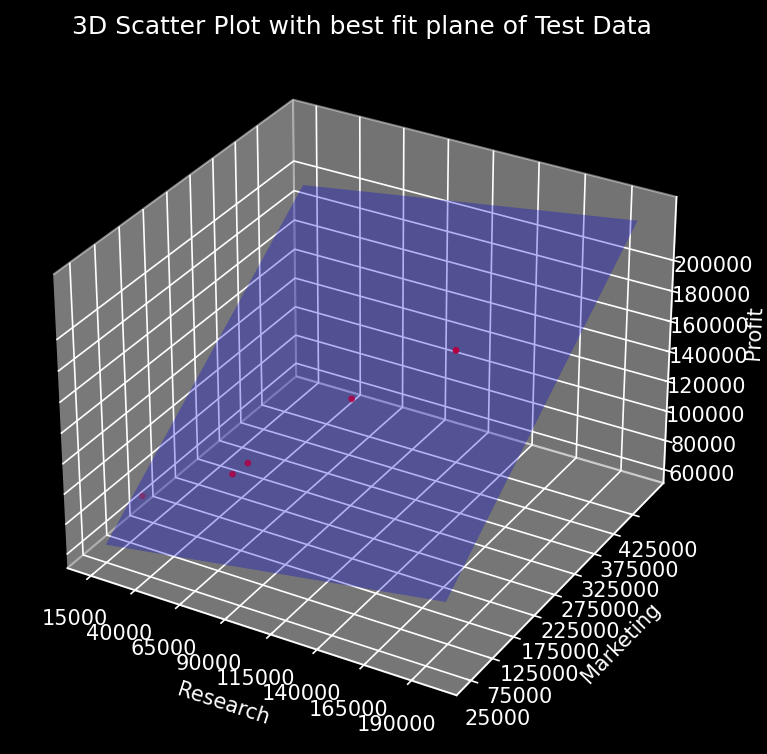

In [16]:
k = []
l = []
for i in range(len(X_test)):
    k.append(X_test[i][0])
    l.append(X_test[i][1])
s = mlr.predict(X_test).tolist()
x2 = [k[i] ** 2 for i in range(len(k))]  # squaring x values
y2 = [l[i] ** 2 for i in range(len(l))]  # squaring y values
xy = [k[i] * l[i] for i in range(len(k))]  # multiplying x and y values
xz = [k[i] * s[i] for i in range(len(k))]  # multiplying x and z values
yz = [l[i] * s[i] for i in range(len(l))]  # multiplying y and z values
xx = sum(k)  # sum of x values
Y = sum(l)  # sum of y values
Z = sum(s)  # sum of z values
XY = sum(xy)  # sum of xy values
XZ = sum(xz)  # sum of xz values
YZ = sum(yz)  # sum of yz values
X2 = sum(x2)  # sum of x2 values
Y2 = sum(y2)  # sum of y2 values
n = len(k)  # number of values
A = [[n, xx, Y], [xx, X2, XY], [Y, XY, Y2]]  # matrix A
B = [Z, XZ, YZ]  # matrix B
A_inv = np.linalg.inv(A)  # inverse of A # type: ignore
ans = np.matmul(A_inv, B)  # multiplying A inverse and B
a = ans[0]  # a value
b = ans[1]  # b value
c = ans[2]  # c value
fig = plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")  # changing the background color
ax = fig.add_subplot(111, projection="3d")  # syntax for 3-D projection
ax.scatter(k, l, s, marker=MarkerStyle("."), color="red")  # plotting points
ax.set_xticks(np.arange(15000, 200000, 25000))
ax.set_yticks(np.arange(25000, 475000, 50000))
ax.set_zticks(np.arange(60000, 220000, 20000))  # type: ignore
ax.set_xlabel("Research")
ax.set_ylabel("Marketing")
ax.set_zlabel("Profit")  # type: ignore
plt.title("3D Scatter Plot with best fit plane of Test Data")
p = np.linspace(15000, 200000, 100)  # creating a list of 100 values
q = np.linspace(25000, 475000, 100)  # creating a list of 100 values
p, q = np.meshgrid(p, q)  # creating a meshgrid
eq = a + b * p + c * q  # equation of plane
ax.plot_surface(p, q, eq, alpha=0.3, color="blue")  # plotting plane # type: ignore
plt.savefig("Images/3D_Plot_Test_Data.png", bbox_inches="tight")

## Additional Performance Metrics


In [17]:
print("Mean Absolute Error (MAE) :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) :", mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error (RMSE) :",
    root_mean_squared_error(y_test, y_pred),
)
print("Mean Squared Log Error (MSLE) :", mean_squared_log_error(y_test, y_pred))
print(
    "Root Mean Squared Log Error (RMSLE) :",
    root_mean_squared_log_error(y_test, y_pred),
)
print(
    "Mean Absolute Percentage Error (MAPE) :",
    mean_absolute_percentage_error(y_test, y_pred),
)

Mean Absolute Error (MAE) : 2824.8809977060096
Mean Squared Error (MSE) : 14776168.655012906
Root Mean Squared Error (RMSE) : 3843.978232900507
Mean Squared Log Error (MSLE) : 0.0008924304106277946
Root Mean Squared Log Error (RMSLE) : 0.029873573783995022
Mean Absolute Percentage Error (MAPE) : 0.023124171741744713


## Saving the Model


In [18]:
dump(mlr, "../../../../../Models/multipleLinearRegressor.joblib")

['../../../../../Models/multipleLinearRegressor.joblib']